In [1]:
import os 
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

from nf2.evaluation.unpack import load_cube
import numpy as np

In [2]:
# extrapolated_field = "/userhome/jeon_mg/workspace/_data/isee/noaa_12673/20170906_083600_pf/extrapolation_result.nf2"
# b = load_cube(extrapolated_field, progress=True)
# np.save('data/nf2_12673.npy', b)
b = np.load('data/nf2_12673.npy')

In [3]:
b.shape

(513, 257, 257, 3)

In [4]:
b = b[:, :, :50, :]
b.shape

(513, 257, 50, 3)

In [5]:
b_norm = 2500
B = np.load('data/outputs_12673.npy')*b_norm
B = B.transpose(1, 2, 3, 0)
B.shape

(513, 257, 50, 3)

In [6]:
from tools.ploting import plot_overview
from tools.metric import evaluate
from tools.metric_another import metrics

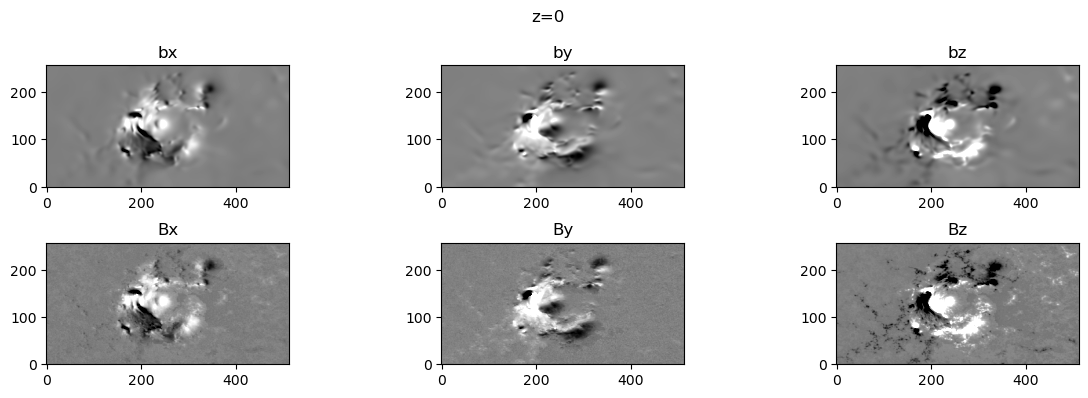

In [7]:
plot_overview(b, B, z=0, b_norm=1000)

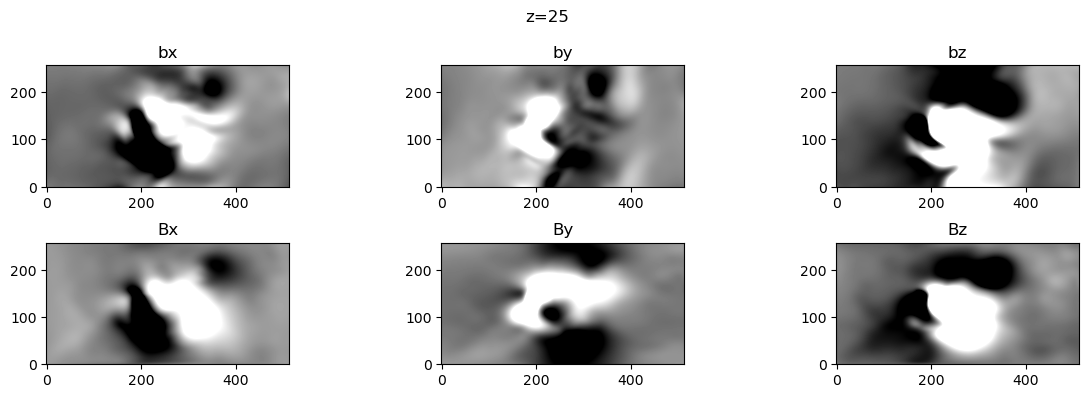

In [8]:
plot_overview(b, B, z=25, b_norm=100)

In [9]:
evaluate(b, B)

/userhome/jeon_mg/workspace/project/CNN_NF2/NF2_compare/tools/metric.py:58: RuntimeWarning: invalid value encountered in divide
  result['C_cs'] = 1 / M * np.sum((B * b).sum(-1) / vector_norm(B) / vector_norm(b))
/userhome/jeon_mg/workspace/project/CNN_NF2/NF2_compare/tools/metric.py:63: RuntimeWarning: divide by zero encountered in divide
  E_m = 1 / M * (vector_norm(b - B) / vector_norm(B)).sum()
/userhome/jeon_mg/workspace/project/CNN_NF2/NF2_compare/tools/metric.py:76: RuntimeWarning: invalid value encountered in divide
  result['sig_J_1e2_B'] = (vector_norm(np.cross(J, B, -1)) / vector_norm(B)).sum() / (vector_norm(J).sum() + 1e-6) * 1e2
/userhome/jeon_mg/workspace/project/CNN_NF2/NF2_compare/tools/metric.py:81: RuntimeWarning: invalid value encountered in divide
  result['L1_B'] = (vector_norm(np.cross(curl(B), B, -1)) ** 2 / vector_norm(B) ** 2).mean()


{'C_vec': 0.9251434779033678,
 'C_cs': nan,
 "E_n'": 0.4326725663854216,
 "E_m'": -inf,
 'eps': 1.037875007772418,
 'sig_J_1e2': 11.695774314280158,
 'sig_J_1e2_B': nan,
 'L1': 2.3845587,
 'L2': 0.8595342,
 'L1_B': nan,
 'L2_B': 175.9493615073281,
 'L2n': 0.35875437315553427,
 'L2n_B': 2414762027.1988177}

In [10]:
metrics(b, B)

{'c_vec': 0.925143477903368,
 'c_cs': 0.5538505479305673,
 'c_cs_ep': 0.5538505479147535,
 "E_n'": 0.4326725663854216,
 "E_m'": -0.0761418339947455,
 "E_m'_ep": -2713471.233217136,
 'eps': 1.037875007772418}

In [11]:
import matplotlib.pyplot as plt

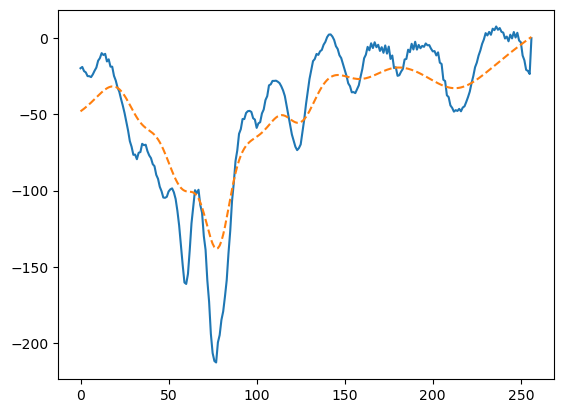

In [12]:
plt.plot(B[..., 5, 2][100, :])
plt.plot(b[..., 5, 2][100, :], '--')